In [1]:
pip install handcalcs

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
import handcalcs.render

from pint import UnitRegistry
u=UnitRegistry(auto_reduce_dimensions=True)

import math

import numpy as np

import matplotlib.pylab as plt

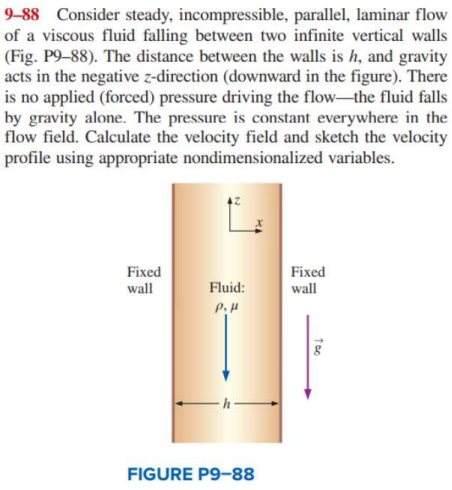

## Solution:
Given a viscous fluid falling between the two infinite vertical walls, the velocity is to be determined.

## Assumptions:
The walls are infinite. The flow is steady, incompressible, laminar, and parallel. The pressure is constant everywhere. The velocity field is two dimensional, and gravity only acts in the z-direction.

## Analysis: 
First list the boundary conditions from the no-slip condition at the walls:
 - At $x = \dfrac{-h}{2}$, $u = v = w = 0$.
 - At $x =  \dfrac{h}{2}$, $u = v = w = 0$.
 
 Next simplify the continuity equation
 \begin{equation*}
 \dfrac{\partial u}{\partial x} + \dfrac{\partial v}{\partial y} + \dfrac{\partial w}{\partial z} = 0 \qquad \dfrac{\partial w}{\partial z} = 0
 \end{equation*}
 From this we understand that $w$ is not a function of $z$, and the flow is the same at any $z$ location. Thus, the flow is fully developed.Because $w$ is  not a function of time, $z$, or $y$, then it most be a function of x.
 
 \begin{equation*}
 w = w(x)
 \end{equation*}
 
 Next, simplify the Navier-Stokes equation with the assumptions that $u = v = 0$ everywehere, and gravity only acts in the z-direction. The z-momentum equation is
 
 \begin{equation*}
 \rho(\dfrac{\partial w}{\partial t} + u\dfrac{\partial w}{\partial x} + v\dfrac{\partial w}{\partial y} + w\dfrac{\partial w}{\partial z}) = -\dfrac{\partial P}{\partial z} + \rho g_z + \mu( \dfrac{\partial^2 w}{\partial x^2} + \dfrac{\partial^2 w}{\partial y^2} + \dfrac{\partial^2 w}{\partial z^2}) \\
 \dfrac{d^2 w}{dx^2} = \dfrac{\rho g}{\mu}
 \end{equation*}
 
 Because w is a function of x, the PDE becomes an ODE by changing a partial derivative to a total derivative.

Next, Solve the differential equation.

It must be integrated twice:

\begin{equation*}
w = \dfrac{\rho g}{2\mu}x^2 + C_1x + C_2
\end{equation*}

Now apply the boundary conditions to solve for $C_1$ and $C_2$

- When x = $\dfrac{-h}{2}$, $u = v = w = 0$
\begin{equation*}
0 = \dfrac{\rho g}{8\mu}h^2 - C_1\dfrac{h}{2} + C_2
\end{equation*}

- When x = $\dfrac{h}{2}$, $u = v = w = 0$
\begin{equation*}
0 = \dfrac{\rho g}{8\mu}h^2 + C_1\dfrac{h}{2} + C_2
\end{equation*}

Now solve those equations simultaneously to find $C_1$ and $C_2$

\begin{equation*}
C_1 = 0 \qquad C_2 = \dfrac{-\rho g}{8\mu}h^2
\end{equation*}

Now, plugging those constant into the equation:

\begin{equation*}
w = \dfrac{\rho g}{2\mu}(x^2 - (\dfrac{h}{2})^2)
\end{equation*}

In [29]:
%%render param
rho = 1000 #only values for plotting
g = 9.81
h = 10 #distance between walls
mu = 0.5

<IPython.core.display.Latex object>

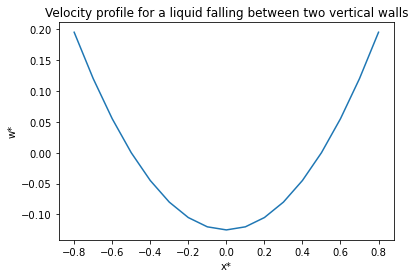

In [35]:
x = np.arange(-8,9)
x_star = x/h #nondimensional equations
w_star = 1/2*((x_star**2)-1/4)

plt.plot(x_star,w_star)
plt.title('Velocity profile for a liquid falling between two vertical walls')
plt.ylabel('w*')
plt.xlabel('x*')
plt.show()